<a href="https://colab.research.google.com/github/ITBA-Python/Certificacion-Profesional-Python/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../') 
import Helper as faux
import pandas as pd
from clases.Usuario import Usuario
from clases.Persona import Persona


#df_personas, df_trabajadores, df_usuarios, df_peliculas, df_scores=Faux.load_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of clases.Usuario failed: Traceback (most recent call last):
  File "C:\Users\LS59282\AppData\Roaming\Python\Python36\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\LS59282\AppData\Roaming\Python\Python36\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "c:\Users\LS59282\AppData\Local\Programs\Python\Python36\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "c:\Users\LS59282\AppData\Local\Programs\Python\Python36\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>

In [3]:
# Acciones con la clase Peliculas

# Cargo el df método create_df_from_csv() directamente desde la clase
df_usuarios = Usuario.create_df_from_csv("../data/usuarios.csv")
df_usuarios


,ocupacion,fecha_alta
id,,
1,technician,1997-09-22 21:57:58
2,other,1998-02-27 03:26:00
3,writer,1998-03-07 02:15:39
4,technician,1998-04-08 02:09:34
5,other,1997-09-30 15:57:44
...,...,...
939,student,1997-11-23 04:50:36
940,administrator,1998-01-14 18:01:38
941,student,1997-09-23 21:01:35


In [4]:
#Doy de Alta satisfactoriamente con el metodo write_df
NuevoUsuarioSinID = Usuario(cod_postal='2222',ocupacion="dev",fecha_alta='1998-02-27 03:26:00',id=None)
print(f'Agrego Usuario Sin ID')
df_UsuarioAgregado = NuevoUsuarioSinID.write_df(df_usuarios)
print(f'Rows del df original: {df_usuarios.shape[0]}\nRows del df Agregado: {df_UsuarioAgregado.shape[0]}\n')


Agrego Usuario Sin ID
Rows del df original: 943
Rows del df Agregado: 943



In [5]:
#Doy de Alta insatisfactoriamente con el metodo write_df ya que el ID existe

NuevaUsuarioConIDExistente = Usuario(fullname='Repeto Juan',fecha_nac=2000,ocupacion="dev",fecha_alta='1998-02-27 03:26:00',id=35)
print(f'Fallo Agregando Usuario con ID Existente')
df_personasAgregado2 = NuevaUsuarioConIDExistente.write_df(df_usuarios)
print(f'Rows del df original: {df_usuarios.shape[0]}\nRows del df Agregado2: {df_personasAgregado2.shape[0]}')



Fallo Agregando Usuario con ID Existente
Error: No se pudo agregar, id ya existente
Rows del df original: 943
Rows del df Agregado2: 943


In [6]:
#Los criterios del filtro son todos AND salvo en generos que trae todos los mencionados, no hace falta que esten todos en la misma pelicula
#Vamos a Filtrar segun algunos criterios la df
ListaUsuariosFiltradas1= Usuario.get_from_df(df_usuarios, ocupacion='homemaker') #El filtro de nombre es un contiene para ser mas abarcativo
ListaUsuariosFiltradas2= Usuario.get_from_df(df_usuarios, id=33) #El filtro de nombre es un contiene para ser mas abarcativo


#Vamos a ver los filtros
print(f'Filtro1: cantidad {len(ListaUsuariosFiltradas1)} \n {ListaUsuariosFiltradas1}\n') # Se printean de acuerdo al metodo.__repr__ de la clase
print(f'Filtro2: cantidad {len(ListaUsuariosFiltradas2)}\n{ListaUsuariosFiltradas2}\n')



Filtro1: cantidad 7 
 [
 
 [20] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1997-11-16 08:06:24, 
 
 [35] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1997-09-28 15:02:21, 
 
 [356] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1998-04-01 04:40:19, 
 
 [362] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1998-01-17 06:41:00, 
 
 [708] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1997-10-20 05:25:35, 
 
 [722] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1998-03-30 17:45:45, 
 
 [898] None (None) --- CP:None , ocupacion=homemaker, fecha_alta=1998-02-24 04:26:15]

Filtro2: cantidad 1
[
 
 [33] None (None) --- CP:None , ocupacion=student, fecha_alta=1998-04-07 15:34:50]



In [7]:
print('Decidimos borrar de df_personas los resultados de ListaFiltrada1')
print(f'Rows del df original: {df_usuarios.shape[0]}')
df_usuariosBorradas=df_usuarios.copy()
for x in ListaUsuariosFiltradas1:
    df_usuariosBorradas=x.remove_from_df(df_usuariosBorradas)
print(f'Rows del df luego del borrado: {df_usuariosBorradas.shape[0]}')

Decidimos borrar de df_personas los resultados de ListaFiltrada1
Rows del df original: 943
Rows del df luego del borrado: 936


In [8]:
#Altero algun dato del filtro 3 por ejemplo el año y despues trato de borrarla
print(f'Rows del df original: {df_usuarios.shape[0]}')
ListaUsuariosFiltradas2[0].ocupacion='cantante'
df_usuariosBorradas2=ListaUsuariosFiltradas2[0].remove_from_df(df_usuarios)
print(f'Rows del df luego del intento de borrado: {df_usuariosBorradas2.shape[0]}')



Rows del df original: 943
No existe en el df recibido una persona exactamente igual a la que invoca esta acción
Rows del df luego del intento de borrado: 943


El Total de Usuarios es:  798


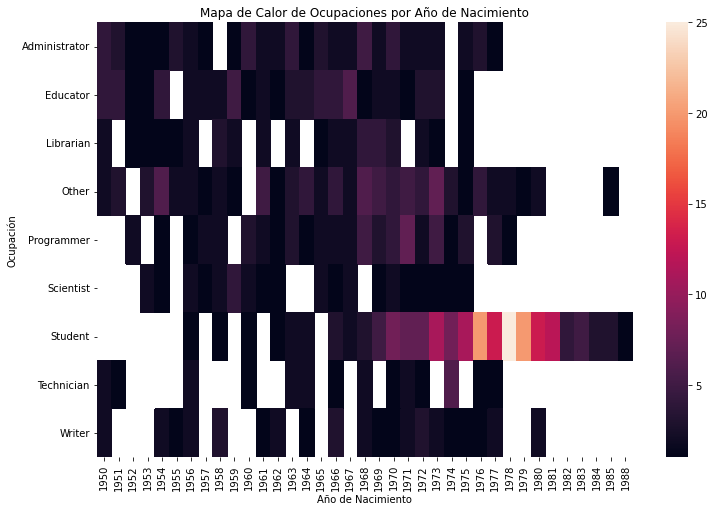

In [ ]:
df_personas = Persona.create_df_from_csv("../data/personas.csv")
Ocupaciones=['writer','administrator','scientist','librarian','educator','programmer','other','technician']
Usuario.get_stats(df_usuarios,df_personas, ocupacionesList=Ocupaciones, aniosDeInteres=[1950,1990])


El Total de Usuarios es:  592


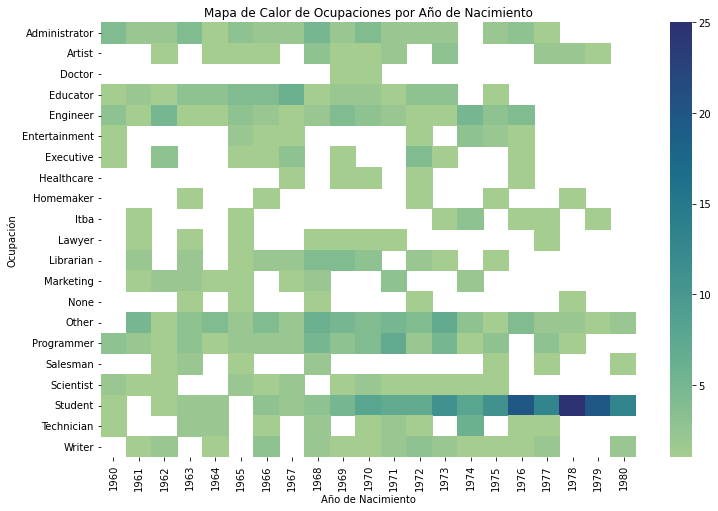

In [35]:
Usuario.get_stats(df_usuarios,df_personas, aniosDeInteres=[1960,1980])